# AULA 55 - EXPLICABILIDADE E ÉTICA Parte 2 (17-10-2025)

Alan Diek Guimarães

## Códigos da aula anterior

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, models


In [28]:
# Tratar os dados

# Ler os dados
dados = pd.read_csv('churn.csv')

# Preparar o encoding dos dados
encoder = LabelEncoder()
dados['Gender'] = encoder.fit_transform(dados['Gender'])
dados['Subscription Type'] = encoder.fit_transform(dados['Subscription Type'])
dados['Contract Length'] = encoder.fit_transform(dados['Contract Length'])

# Separar o X e o y
X = dados.drop('Churn', axis=1).values
y = dados['Churn'].values

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from tensorflow.keras.models import load_model

# Carregando o modelo
modelo2 = load_model('modelo_churn_(Alan_Diek).h5')

In [30]:
exemplo = dados.drop('Churn', axis=1).iloc[0].values

resultado_esperado = dados['Churn'].iloc[0]
entrada = np.array(exemplo).reshape(1, -1)

predicao = modelo2.predict(entrada)

print(f'\nResultado esperado: {resultado_esperado}')
print(f'\nPredição do modelo: {predicao[0][0]:.2f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Resultado esperado: 1

Predição do modelo: 1.00


In [31]:
modelo2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931 (3.64 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Continuação

Construindo o modelo ***SHAP***

In [32]:
# instalar a biblioteca shap (executar no kernel do notebook)
# %pip install shap

# importar a biblioteca do shap
import shap


# Criar um explicador do modelo com o SHAP
# Criar um KernelExplainer usando uma amostra de treinamento

explainer = shap.KernelExplainer(
    lambda data: modelo2.predict(data).flatten(),
    shap.sample(X_train, 50)
)
shap_values = explainer.shap_values(X_train[:100])  # Calcular os valores SHAP para os primeiros 100 exemplos de treinamento

print("Calculando o SHAP, shap value shape:", shap_values[0].shape)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step


  1%|          | 1/100 [00:01<03:10,  1.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step


  2%|▏         | 2/100 [00:03<03:04,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step


  3%|▎         | 3/100 [00:05<03:08,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step


  4%|▍         | 4/100 [00:07<03:15,  2.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step


  5%|▌         | 5/100 [00:09<03:07,  1.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 395us/step


  6%|▌         | 6/100 [00:11<03:02,  1.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step


  7%|▋         | 7/100 [00:13<03:02,  1.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 397us/step


  8%|▊         | 8/100 [00:15<02:58,  1.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step


  9%|▉         | 9/100 [00:17<02:52,  1.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step


 10%|█         | 10/100 [00:19<02:49,  1.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step


 11%|█         | 11/100 [00:21<02:45,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step


 12%|█▏        | 12/100 [00:22<02:42,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step


 13%|█▎        | 13/100 [00:24<02:40,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step


 14%|█▍        | 14/100 [00:26<02:38,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step


 15%|█▌        | 15/100 [00:28<02:37,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step


 16%|█▌        | 16/100 [00:30<02:34,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step


 17%|█▋        | 17/100 [00:32<02:32,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step


 18%|█▊        | 18/100 [00:33<02:29,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step


 19%|█▉        | 19/100 [00:35<02:28,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step


 20%|██        | 20/100 [00:37<02:27,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step


 21%|██        | 21/100 [00:39<02:25,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step


 22%|██▏       | 22/100 [00:41<02:23,  1.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step


 23%|██▎       | 23/100 [00:43<02:19,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step


 24%|██▍       | 24/100 [00:44<02:17,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step


 25%|██▌       | 25/100 [00:46<02:15,  1.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step


 26%|██▌       | 26/100 [00:48<02:12,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step


 27%|██▋       | 27/100 [00:50<02:10,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step


 28%|██▊       | 28/100 [00:51<02:08,  1.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step


 29%|██▉       | 29/100 [00:53<02:05,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 30%|███       | 30/100 [00:55<02:03,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step


 31%|███       | 31/100 [00:57<02:01,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step


 32%|███▏      | 32/100 [00:58<02:00,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step


 33%|███▎      | 33/100 [01:00<01:58,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step


 34%|███▍      | 34/100 [01:02<01:56,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step


 35%|███▌      | 35/100 [01:04<01:55,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 36%|███▌      | 36/100 [01:06<01:52,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step


 37%|███▋      | 37/100 [01:07<01:51,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step


 38%|███▊      | 38/100 [01:09<01:49,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 39%|███▉      | 39/100 [01:11<01:47,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step


 40%|████      | 40/100 [01:13<01:45,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step


 41%|████      | 41/100 [01:14<01:43,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step


 42%|████▏     | 42/100 [01:16<01:41,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step


 43%|████▎     | 43/100 [01:18<01:39,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step


 44%|████▍     | 44/100 [01:20<01:38,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step


 45%|████▌     | 45/100 [01:21<01:36,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 46%|████▌     | 46/100 [01:23<01:34,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 47%|████▋     | 47/100 [01:25<01:32,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step


 48%|████▊     | 48/100 [01:27<01:30,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step


 49%|████▉     | 49/100 [01:28<01:29,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step


 50%|█████     | 50/100 [01:30<01:27,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step


 51%|█████     | 51/100 [01:32<01:25,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step


 52%|█████▏    | 52/100 [01:34<01:24,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step


 53%|█████▎    | 53/100 [01:35<01:23,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 54%|█████▍    | 54/100 [01:37<01:21,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step


 55%|█████▌    | 55/100 [01:39<01:18,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 56%|█████▌    | 56/100 [01:41<01:16,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step


 57%|█████▋    | 57/100 [01:42<01:15,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 58%|█████▊    | 58/100 [01:44<01:13,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step


 59%|█████▉    | 59/100 [01:46<01:11,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step


 60%|██████    | 60/100 [01:48<01:10,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step


 61%|██████    | 61/100 [01:49<01:09,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 405us/step


 62%|██████▏   | 62/100 [01:51<01:09,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step


 63%|██████▎   | 63/100 [01:53<01:07,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step


 64%|██████▍   | 64/100 [01:55<01:06,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step


 65%|██████▌   | 65/100 [01:57<01:04,  1.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 66%|██████▌   | 66/100 [01:59<01:02,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step


 67%|██████▋   | 67/100 [02:01<01:00,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step


 68%|██████▊   | 68/100 [02:02<00:58,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step


 69%|██████▉   | 69/100 [02:04<00:56,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step


 70%|███████   | 70/100 [02:06<00:54,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 390us/step


 71%|███████   | 71/100 [02:08<00:52,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step


 72%|███████▏  | 72/100 [02:10<00:50,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 73%|███████▎  | 73/100 [02:11<00:48,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 74%|███████▍  | 74/100 [02:13<00:46,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step


 75%|███████▌  | 75/100 [02:15<00:44,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 76%|███████▌  | 76/100 [02:17<00:42,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step


 77%|███████▋  | 77/100 [02:18<00:40,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 420us/step


 78%|███████▊  | 78/100 [02:20<00:40,  1.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step


 79%|███████▉  | 79/100 [02:22<00:38,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step


 80%|████████  | 80/100 [02:24<00:36,  1.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step


 81%|████████  | 81/100 [02:26<00:34,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 82%|████████▏ | 82/100 [02:27<00:31,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step


 83%|████████▎ | 83/100 [02:29<00:30,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 84%|████████▍ | 84/100 [02:31<00:28,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 85%|████████▌ | 85/100 [02:33<00:26,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step


 86%|████████▌ | 86/100 [02:34<00:24,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 87%|████████▋ | 87/100 [02:36<00:22,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step


 88%|████████▊ | 88/100 [02:38<00:20,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step


 89%|████████▉ | 89/100 [02:40<00:19,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step


 90%|█████████ | 90/100 [02:41<00:17,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step


 91%|█████████ | 91/100 [02:43<00:15,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 92%|█████████▏| 92/100 [02:45<00:13,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step


 93%|█████████▎| 93/100 [02:47<00:12,  1.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step


 94%|█████████▍| 94/100 [02:49<00:10,  1.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 363us/step


 95%|█████████▌| 95/100 [02:50<00:08,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step


 96%|█████████▌| 96/100 [02:52<00:07,  1.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step


 97%|█████████▋| 97/100 [02:54<00:05,  1.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step


 98%|█████████▊| 98/100 [02:56<00:03,  1.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step


 99%|█████████▉| 99/100 [02:57<00:01,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
3197/3197 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step


100%|██████████| 100/100 [02:59<00:00,  1.80s/it]

Calculando o SHAP, shap value shape: (11,)


In [33]:
print("Calculando o SHAP, shap value shape:", shap_values[0].shape)

Calculando o SHAP, shap value shape: (11,)


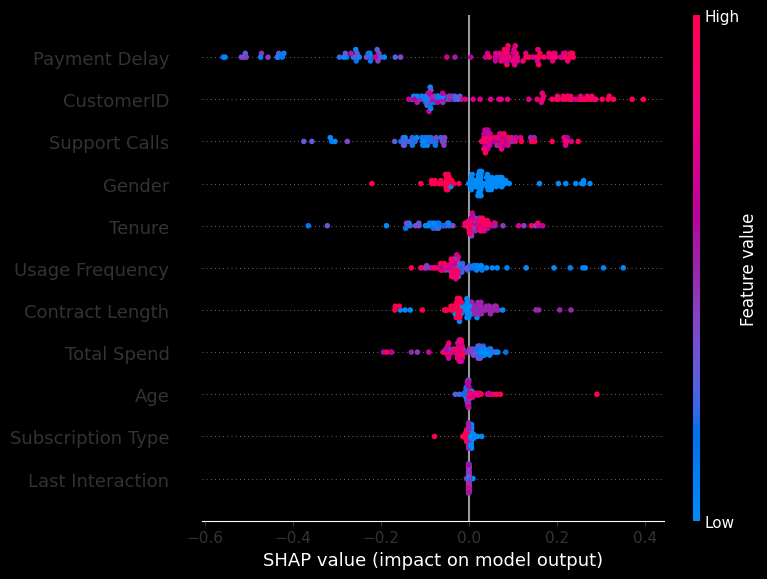

In [34]:
'''
Plot dos valores de Shapley de cada feature que foi usado,
quanto maior o valor, mais importante foi a feature (ou seja, mais importante para o modelo para um lado)
quento menor o valor maior a feature (ou seja, menos importante para o modelo para o outro lado)
'''
shap.summary_plot(
    shap_values,
    X_train[:100],
    feature_names=dados.drop('Churn', axis=1).columns
)

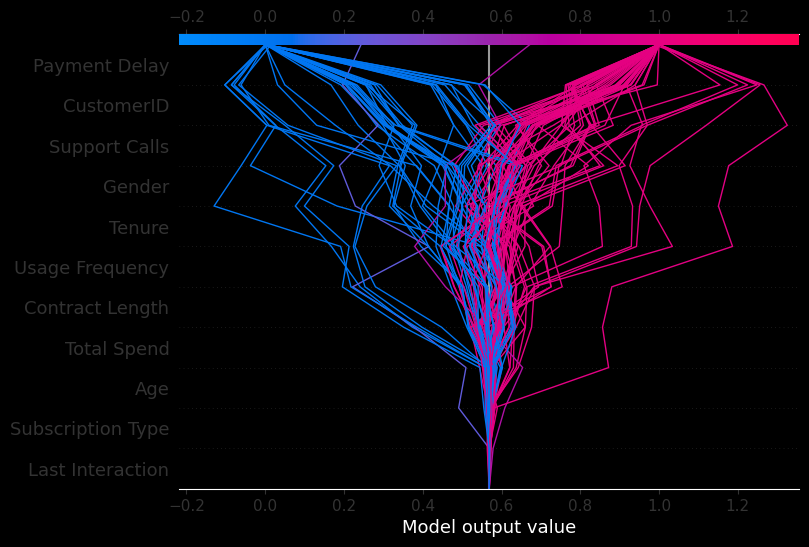

In [35]:
shap.decision_plot(
    explainer.expected_value,
    shap_values,
    dados.drop('Churn', axis=1).columns
    
)

LIME

In [36]:
# %pip install lime

In [37]:
# Fazendo o importe do lime
import lime
from lime.lime_tabular import LimeTabularExplainer

In [38]:
# Converter dados para um df para o LIME
X_train_np = np.array(X_train)
X_test_np   = np.array(X_test)

In [39]:
# Criar um explicador usando o LIME
explainer_lime = LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=dados.columns,
    class_names=['Não Churn', 'Churn'],
    mode='classification'
)

- Escolher alguém (amostra) para explicar 
- O LIME vai explicar o processo de decisão do modelo
- Nesse único individuo
- Diferente do SHAP que usa uma amostra com múltiplos indivíduos. 

In [ ]:
i = 0 # Seleciona o individuo 0.
exemplo = X_test_np[i]

# Criando uma função para o explicador do LIME executar e avaliar o modelo.
def predict_fn_lime(x): 
    probs_classe1 = modelo2.predict(x, verbose=0).flatten()
    probs_classe0 = 1 - probs_classe1
    return np.vstack([probs_classe0, probs_classe1]).T

# Avaliador que vai gerar a minha explicação.
exp = explainer_lime.explain_instance(
    data_row = exemplo, 
    predict_fn = predict_fn_lime
)

# Mostrar o resultado
print("=" * 50)
print(f"Explicação local para a amostra: {i}")
print(exp.as_list())

# Espaçamento
print("=" * 50, '\n\n\n')

# usar import seguro a partir de IPython.display e mostrar o HTML gerado pelo LIME
from IPython.display import display, HTML

html = exp.as_html()  # gera o HTML da explicação
display(HTML(html))

Explicação local para a amostra: 0
[('Payment Delay <= -0.81', -0.3645484947000437), ('CustomerID <= -0.87', -0.16248855047457167), ('-0.77 < Support Calls <= 0.19', 0.09647884323019526), ('-0.93 < Gender <= 1.07', -0.08930447272006632), ('Usage Frequency > 0.90', -0.04951588605813995), ('-1.22 < Contract Length <= 0.01', 0.04625323096001129), ('Age > 0.86', 0.0423384281429779), ('-0.03 < Total Spend <= 0.87', -0.0366955346906997), ('-0.82 < Tenure <= 0.06', 0.034394754674846935), ('-0.00 < Subscription Type <= 1.22', -0.019369150102853838)]





Usar o Fairlearn para analisar o nosso modelo

In [ ]:
# %pip install fairlearn

In [ ]:
# importar a biblioteca do fairlearn.
from fairlearn.metrics import MetricFrame, selection_rate, false_negative_rate, false_positive_rate
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

In [ ]:
# Separando a variável sensível que usaremos.
A = dados['Gender']

# Dividir em treino e teste.
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.2, random_state=42)

In [59]:
# Criar uma lista de predição usando os nossos dados de validação.
y_pred = modelo2.predict(X_test)

403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


In [72]:
# Avaliando as métricas por grupo
metric_frame = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test
)

# Mostrando os resultados em porcentagem. 
print(f'''
Seleção por gênero:

0 = gênero Feminino 
1 = gênero Masculino
 
{metric_frame.by_group}''')
# 0 é o 
# 1 é o 


Seleção por gênero:

0 = gênero Feminino 
1 = gênero Masculino

Gender
0    0.346249
1    0.232280
Name: selection_rate, dtype: float64


In [73]:
# DIferença entre escolha de grupos
diff = metric_frame.difference(method='between_groups') 

# Razão da escolha de grupos
ratio = metric_frame.ratio(method='between_groups')

print(f'''Diferença absoluta entre os grupos: {diff:.3f}''') # Se for 1 modelo com viés

print(f'''Razão entre os grupos: {ratio:.3f}''')            # Se for 0 modelo com viés

Diferença absoluta entre os grupos: 0.114
Razão entre os grupos: 0.671


podemos usar o fairnlearn para mitigar viés no modelo

In [75]:
# %pip install scikeras

In [76]:
# importar as bibliotecas
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import clone_model

In [85]:
# Função que retorna o modelo com a mesma arquitetura e pesos iniciais

def build_model():
    model = clone_model(modelo2)
    model.set_weights(modelo2.get_weights())
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criar o KerasClassifier como wrapper do nosso modelo
keras_clf = KerasClassifier(
    build_fn = build_model,
    epochs= 10,
    batch_size= 32,
    verbose= 0
)

# Criar um mitigador
mitigador = ExponentiatedGradient(
    estimator = keras_clf,
    constraints= DemographicParity(),
)

# Treinar o mitigador
mitigador.fit(X_train, y_train, sensitive_features = A_train)

# Criar uma lista com as previsões mitigadas.
y_pred_mitigado = mitigador.predict(X_test)

c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarn

In [88]:
# Avaliando as métricas por grupo
metric_frame = MetricFrame(
    metrics=selection_rate,
    y_true=y_test,
    y_pred=y_pred_mitigado,
    sensitive_features=A_test
)

# Mostrando os resultados em porcentagem. 
print(f'''
Seleção por gênero:

0 = gênero Feminino 
1 = gênero Masculino
 
{metric_frame.by_group}''')
# 0 é o 
# 1 é o 


Seleção por gênero:

0 = gênero Feminino 
1 = gênero Masculino

Gender
0    0.531391
1    0.524126
Name: selection_rate, dtype: float64


In [89]:
# DIferença entre escolha de grupos
diff = metric_frame.difference(method='between_groups') 

# Razão da escolha de grupos
ratio = metric_frame.ratio(method='between_groups')

print(f'''Diferença absoluta entre os grupos: {diff:.3f}''') # Se for 1 modelo com viés

print(f'''Razão entre os grupos: {ratio:.3f}''')            # Se for 0 modelo com viés

Diferença absoluta entre os grupos: 0.007
Razão entre os grupos: 0.986
